<a href="https://colab.research.google.com/github/joyoustreasure/DS_Project/blob/master/Edutech_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd content/drive/MyDrive
# %cd MyDrive/edutech
#%cd drive/MyDrive/edutech
%ls


drive/  sample_data/


In [ ]:
%cd edutech
%ls

/content/drive/MyDrive/edutech
'001_리딩앤 학습데이터_아이포트폴리오.xlsx'  'survival_data(for 0,1).csv'
'002_발음 분석 문장.csv'                      user.csv
'002_발음 분석 문장_level추가.csv'            week.csv
'003_페이지별 학습시간.csv'                  '레벨 dict.xlsx'
'1~5단계 완료 이력.csv'                      '월별 학습 통계.csv'
'2203 project.ipynb'                          이탈.ipynb
 2303project.ipynb                            읽은책권수.csv
 ds.csv                                       제공데이터요약.csv
 level_series.csv                            '주별 학습 통계.csv'
 survival.csv


In [ ]:
import numpy as np
import pandas as pd

data_path='drive/'

#df_1 = pd.read_excel('/Users/choiheejin/Desktop/Edutech/1.xlsx')
df_2 = pd.read_csv('002_발음 분석 문장_level추가.csv')
df_3 = pd.read_csv('003_페이지별 학습시간.csv')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
voice = pd.read_csv('002_발음 분석 문장_level추가.csv',index_col = 0)
voice.head()

,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0


In [ ]:
stime = pd.read_csv('003_페이지별 학습시간.csv')
stime
#duration: 한페이지 읽을 때 걸린 시간(sec)


,user_idx,bid,page,duration,read_time
0,10464,TPSRT138,1,823,2023-07-24 16:35:40
1,10464,TPSRT138,2,6808,2023-07-24 16:35:40
2,10464,TPSRT138,3,6808,2023-07-24 16:35:40
3,10464,TPSRT138,4,5650,2023-07-24 16:35:40
4,10464,TPSRT138,5,5650,2023-07-24 16:35:40
...,...,...,...,...,...
1474675,436972,TPSBS02,16,1054,2023-07-25 14:04:28
1474676,436972,TPSBS01,16,2071,2023-07-26 17:42:34
1474677,436972,TPSBS01,16,2450,2023-07-27 18:02:50
1474678,436972,TPSBS01,16,1806,2023-08-01 17:37:53


# 페이지별 학습시간 -> survival data화

## suvival data 형태 (일반적)

In [ ]:
!pip install lifelines

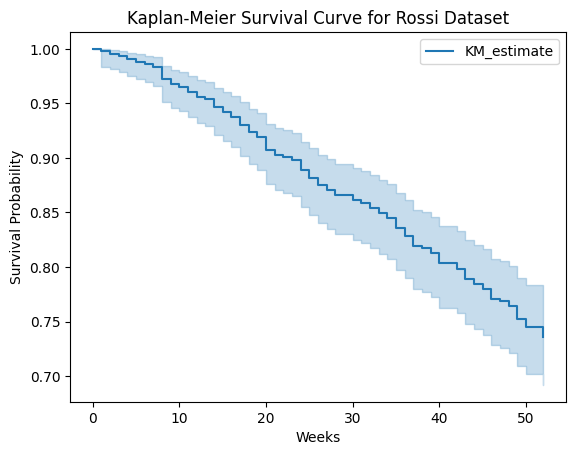

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [ ]:
# 필요한 라이브러리 임포트
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
from lifelines import KaplanMeierFitter
# # 데이터 불러오기
data = load_rossi()

# # Cox PH 모델 인스턴스 생성
# cph = CoxPHFitter()

# # 모델 피팅
# cph.fit(data, duration_col='week', event_col='arrest')

# # 모델 요약 정보 출력
# cph.print_summary()

# 데이터 형태가 다음과 같아야 함

kmf = KaplanMeierFitter()
kmf.fit(data['week'], event_observed=data['arrest'])
kmf.plot()

plt.xlabel('Weeks')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve for Rossi Dataset')
plt.show()

data.head()
#week: time, arrest: 절단여부; 1이면 실제 구속 발생, 0이면 절단됨  그 외에는 features!

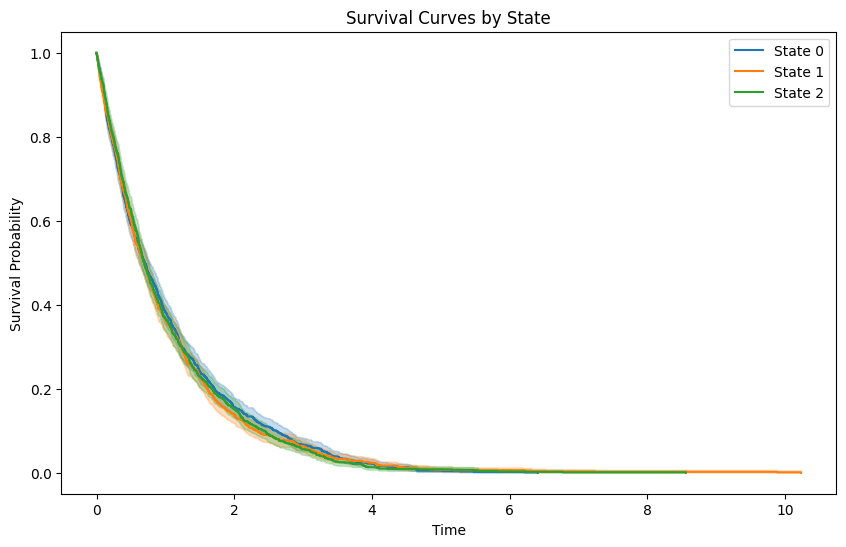

,time_0,time_1,time_2
0,0.795875,1.255931,0.923223
1,0.787201,0.551048,1.038159
2,0.575519,2.223524,3.314912
3,0.483602,1.568896,0.752674
4,0.839433,2.598254,0.073685
...,...,...,...
995,1.199416,0.700569,0.026075
996,1.488783,0.821830,0.086096
997,0.644765,0.338685,2.117613
998,0.335371,2.841931,0.789951


In [ ]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 예시 데이터 생성
np.random.seed(0)
n_samples = 1000

# 재이탈 상태
states = [0, 1, 2]

# 각 상태별 생존 시간 생성
survival_times = np.random.exponential(scale=1, size=(n_samples, len(states)))

# 데이터 프레임 생성
data = pd.DataFrame({'time_0': survival_times[:, 0], 'time_1': survival_times[:, 1], 'time_2': survival_times[:, 2]})

# 상태에 따른 생존 곡선 그리기
plt.figure(figsize=(10, 6))
kmf = KaplanMeierFitter()

# 상태 0에서의 생존 곡선 그리기
kmf.fit(data['time_0'], event_observed=np.ones(n_samples))
kmf.plot(label='State 0')

# 다른 상태에서의 생존 곡선 그리기
for state in states[1:]:
    kmf.fit(data[f'time_{state}'], event_observed=np.ones(n_samples))
    kmf.plot(label=f'State {state}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Curves by State')
plt.legend()
plt.show()

data

## surival data화 하기

In [ ]:
stime[stime.user_idx==10464]

,user_idx,bid,page,duration,read_time
0,10464,TPSRT138,1,823,2023-07-24 16:35:40
1,10464,TPSRT138,2,6808,2023-07-24 16:35:40
2,10464,TPSRT138,3,6808,2023-07-24 16:35:40
3,10464,TPSRT138,4,5650,2023-07-24 16:35:40
4,10464,TPSRT138,5,5650,2023-07-24 16:35:40
...,...,...,...,...,...
151,10464,TPSRT187,15,11798,2023-05-12 17:49:33
152,10464,TPSRT187,16,9586,2023-05-12 17:49:33
153,10464,TPSRT187,17,9586,2023-05-12 17:49:33
154,10464,TPSRT187,18,4646,2023-05-12 17:49:33


In [ ]:
data = stime.copy()
# read_time을 datetime 형식으로 변환
data['read_time'] = pd.to_datetime(data['read_time'])

# 유저 및 read_time 기준으로 데이터 정렬
data_sorted = data.sort_values(by=['user_idx', 'read_time'])

# 각 유저별로 read_time의 차이 계산
data_sorted['time_diff'] = data_sorted.groupby('user_idx')['read_time'].diff().dt.total_seconds()

data_sorted.head()

,user_idx,bid,page,duration,read_time,time_diff
83,10464,TPSRT181,1,1366,2023-01-05 20:11:40,NaN
84,10464,TPSRT181,2,13330,2023-01-05 20:12:07,27.0
85,10464,TPSRT181,3,13331,2023-01-05 20:12:07,0.0
86,10464,TPSRT181,2,1250,2023-01-05 20:12:11,4.0
87,10464,TPSRT181,3,1252,2023-01-05 20:12:11,0.0


In [ ]:
data_sorted.groupby('user_idx')['read_time'].diff()

83                    NaT
84        0 days 00:00:27
85        0 days 00:00:00
86        0 days 00:00:04
87        0 days 00:00:00
                ...      
1254544   0 days 00:00:00
1254546   0 days 00:00:03
1254547   0 days 00:00:00
1254543   0 days 00:00:02
1254545   0 days 00:00:00
Name: read_time, Length: 1474680, dtype: timedelta64[ns]

In [ ]:
data_sorted[data_sorted.user_idx == 10464]

,user_idx,bid,page,duration,read_time,time_diff
83,10464,TPSRT181,1,1366,2023-01-05 20:11:40,NaN
84,10464,TPSRT181,2,13330,2023-01-05 20:12:07,27.0
85,10464,TPSRT181,3,13331,2023-01-05 20:12:07,0.0
86,10464,TPSRT181,2,1250,2023-01-05 20:12:11,4.0
87,10464,TPSRT181,3,1252,2023-01-05 20:12:11,0.0
...,...,...,...,...,...,...
15,10464,TPSRT138,16,6373,2023-07-24 16:35:40,0.0
16,10464,TPSRT138,17,6373,2023-07-24 16:35:40,0.0
17,10464,TPSRT138,18,3877,2023-07-24 16:35:40,0.0
18,10464,TPSRT138,19,3877,2023-07-24 16:35:40,0.0


<Axes: xlabel='read_time', ylabel='Count'>

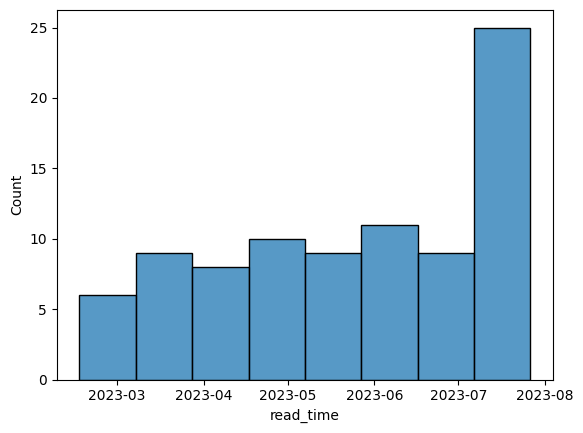

In [ ]:
# 30일을 초 단위로 변환
threshold_seconds = 30 * 24 * 3600

# 중간 이탈자 판별
dropout_users = data_sorted[data_sorted['time_diff'] > threshold_seconds]['user_idx'].unique()
total_users = data_sorted['user_idx'].unique()

dropout_ratio = len(dropout_users) / len(total_users) * 100
dropout_ratio


read_time_ital = data_sorted[data_sorted['time_diff'] > threshold_seconds]
sns.histplot(x='read_time', data = read_time_ital)

<Axes: xlabel='read_time', ylabel='Count'>

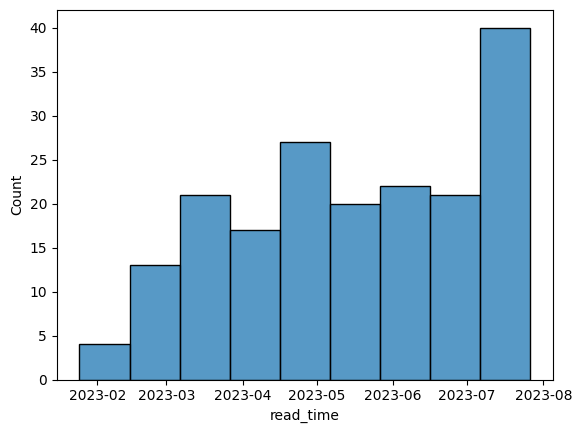

In [ ]:
# 20일을 초 단위로 변환
threshold_seconds = 20 * 24 * 3600

# 중간 이탈자 판별
dropout_users = data_sorted[data_sorted['time_diff'] > threshold_seconds]['user_idx'].unique()
total_users = data_sorted['user_idx'].unique()

dropout_ratio = len(dropout_users) / len(total_users) * 100
dropout_ratio


read_time_ital = data_sorted[data_sorted['time_diff'] > threshold_seconds]
sns.histplot(x='read_time', data = read_time_ital)

In [ ]:
stime_raw = data_sorted[['user_idx','read_time','time_diff']]
print(stime_raw.shape)
stime_raw.head()

(1474680, 3)


,user_idx,read_time,time_diff
83,10464,2023-01-05 20:11:40,NaN
84,10464,2023-01-05 20:12:07,27.0
85,10464,2023-01-05 20:12:07,0.0
86,10464,2023-01-05 20:12:11,4.0
87,10464,2023-01-05 20:12:11,0.0


In [ ]:
stime_surv_full = stime_raw.groupby(['user_idx']).agg(시작=('read_time',min)).reset_index()
stime_surv_full.shape

(293, 2)

In [ ]:
stime_surv_full['끝'] = stime_raw.groupby(['user_idx']).agg(끝=('read_time',max)).reset_index()['끝']
stime_surv_full.head()

,user_idx,시작,끝
0,10464,2023-01-05 20:11:40,2023-07-24 16:35:40
1,10642,2023-03-06 14:46:22,2023-07-26 17:43:38
2,18597,2023-01-02 17:14:36,2023-07-26 17:24:23
3,27336,2023-01-03 19:53:07,2023-07-25 16:15:10
4,35435,2023-01-20 12:16:51,2023-07-26 17:55:34


In [ ]:
threshold_seconds = 20* 24 * 3600

drop_df = data_sorted[data_sorted['time_diff'] > threshold_seconds]
drop_df.groupby(['user_idx']).count().reset_index()[['user_idx','time_diff']].time_diff.value_counts()

1    42
2    34
3    14
4     7
5     1
Name: time_diff, dtype: int64

In [ ]:
drop_20 = drop_df.groupby(['user_idx']).count().reset_index()[['user_idx','time_diff']]
drop_20.columns = ['user_idx','이탈횟수']
drop_20

,user_idx,이탈횟수
0,10464,2
1,27336,1
2,36865,3
3,43019,2
4,76341,1
...,...,...
93,418079,1
94,419648,1
95,422949,1
96,431037,1


In [ ]:
drop_20_d = {}
for user_idx,이탈횟수 in zip(drop_20.user_idx,drop_20.이탈횟수):
  drop_20_d[user_idx] = 이탈횟수
stime_surv_full['이탈횟수'] = stime_surv_full.user_idx.apply(lambda x: drop_20_d[x] if x in drop_20_d else 0)
stime_surv_full.head()

,user_idx,시작,끝,이탈횟수
0,10464,2023-01-05 20:11:40,2023-07-24 16:35:40,2
1,10642,2023-03-06 14:46:22,2023-07-26 17:43:38,0
2,18597,2023-01-02 17:14:36,2023-07-26 17:24:23,0
3,27336,2023-01-03 19:53:07,2023-07-25 16:15:10,1
4,35435,2023-01-20 12:16:51,2023-07-26 17:55:34,0


In [ ]:








surv0 = stime_surv_full[stime_surv_full.이탈횟수==0]
# days_diff = (surv1['끝']-surv1['시작']).days
# surv1['time1'] =
def calculate_days(row):
    days_difference = (row['끝'] - row['시작']).days
    return days_difference

surv0['time1'] = surv0.apply(calculate_days,axis=1)
surv0.time1 = surv0.time1.astype(int)
surv0

<ipython-input-32-bb455920b249>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv0['time1'] = surv0.apply(calculate_days,axis=1)
<ipython-input-32-bb455920b249>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv0.time1 = surv0.time1.astype(int)


,user_idx,시작,끝,이탈횟수,time1
1,10642,2023-03-06 14:46:22,2023-07-26 17:43:38,0,142
2,18597,2023-01-02 17:14:36,2023-07-26 17:24:23,0,205
4,35435,2023-01-20 12:16:51,2023-07-26 17:55:34,0,187
5,36836,2023-02-01 18:18:10,2023-07-26 17:43:11,0,174
8,46153,2023-01-01 11:00:52,2023-07-12 20:31:14,0,192
...,...,...,...,...,...
288,442182,2023-07-25 11:08:35,2023-07-26 17:55:24,0,1
289,442454,2023-07-26 17:40:37,2023-07-26 17:57:18,0,0
290,442482,2023-07-26 17:41:31,2023-07-26 17:41:31,0,0
291,442501,2023-07-26 17:38:32,2023-07-26 17:43:29,0,0


In [ ]:
surv1 = stime_surv_full[stime_surv_full.이탈횟수==1]

ds = data_sorted.reset_index()
ds.head()
drop_df = ds[ds.time_diff>threshold_seconds]
rows1 = drop_df[drop_df.user_idx.isin(surv1.user_idx)][['user_idx','time_diff']].reset_index()
rows1.head()

rows1.columns = ['end_1', 'user_idx','_']
real_end = {}
for user_idx,index in zip(rows1.user_idx,rows1.end_1):
  real_end[user_idx] = [index-1]
  real_end[user_idx].append(ds.iloc[index-1].read_time)

real_end

{27336: [4494, Timestamp('2023-04-04 19:48:01')],
 76341: [45580, Timestamp('2023-02-23 14:31:03')],
 84064: [63692, Timestamp('2023-04-20 18:04:35')],
 87583: [64519, Timestamp('2023-02-24 20:27:24')],
 90074: [68849, Timestamp('2023-05-08 21:04:55')],
 99359: [80296, Timestamp('2023-02-07 19:01:26')],
 136931: [112425, Timestamp('2023-03-14 20:13:08')],
 207753: [279862, Timestamp('2023-06-07 17:45:02')],
 238473: [294421, Timestamp('2023-05-03 22:13:30')],
 245847: [322102, Timestamp('2023-07-05 18:42:12')],
 250115: [326279, Timestamp('2023-03-11 18:45:30')],
 250921: [326816, Timestamp('2023-02-22 12:24:42')],
 252641: [326955, Timestamp('2023-02-22 18:48:15')],
 257048: [332483, Timestamp('2023-02-22 07:06:14')],
 264499: [346644, Timestamp('2023-05-24 07:31:14')],
 284826: [397236, Timestamp('2023-02-27 17:15:10')],
 293485: [399202, Timestamp('2023-06-28 17:12:13')],
 294271: [401725, Timestamp('2023-06-02 13:49:40')],
 297473: [419826, Timestamp('2023-03-01 19:43:23')],
 30345

In [ ]:

surv1.끝 =surv1.user_idx.apply(lambda x: real_end[x][1])


<ipython-input-34-212dd5a947e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv1.끝 =surv1.user_idx.apply(lambda x: real_end[x][1])


In [ ]:
def calculate_days(row):
    days_difference = (row['끝'] - row['시작']).days
    return days_difference

surv1['time1'] = surv1.apply(calculate_days,axis=1)
surv1.time1 = surv1.time1.astype(int)

<ipython-input-35-6f679d02ad52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv1['time1'] = surv1.apply(calculate_days,axis=1)
<ipython-input-35-6f679d02ad52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv1.time1 = surv1.time1.astype(int)


In [ ]:
surv1

,user_idx,시작,끝,이탈횟수,time1
3,27336,2023-01-03 19:53:07,2023-04-04 19:48:01,1,90
12,76341,2023-02-23 14:31:03,2023-02-23 14:31:03,1,0
16,84064,2023-01-01 09:50:44,2023-04-20 18:04:35,1,109
17,87583,2023-02-24 20:25:47,2023-02-24 20:27:24,1,0
18,90074,2023-01-03 20:19:10,2023-05-08 21:04:55,1,125
20,99359,2023-01-01 20:39:40,2023-02-07 19:01:26,1,36
25,136931,2023-01-02 17:02:57,2023-03-14 20:13:08,1,71
48,207753,2023-04-26 19:36:20,2023-06-07 17:45:02,1,41
56,238473,2023-01-04 17:30:09,2023-05-03 22:13:30,1,119
61,245847,2023-04-26 17:15:11,2023-07-05 18:42:12,1,70


In [ ]:
data_sorted.iloc[4014].read_time

Timestamp('2023-02-27 15:08:49')

In [ ]:
ds.head()

,index,user_idx,bid,page,duration,read_time,time_diff
0,83,10464,TPSRT181,1,1366,2023-01-05 20:11:40,NaN
1,84,10464,TPSRT181,2,13330,2023-01-05 20:12:07,27.0
2,85,10464,TPSRT181,3,13331,2023-01-05 20:12:07,0.0
3,86,10464,TPSRT181,2,1250,2023-01-05 20:12:11,4.0
4,87,10464,TPSRT181,3,1252,2023-01-05 20:12:11,0.0


In [ ]:
##############################################################
################여기가 코딩한것####################33

# Calculate the threshold value for time_diff
threshold = 20 * 24 * 3600

# Group by user_idx and calculate censored and cnt values
df = ds.groupby('user_idx').agg(
    censored=('time_diff', lambda x: 1 if any(x > threshold) else 0),
    이탈횟수=('time_diff', lambda x: sum(x > threshold))
).reset_index()
#len(df['user_idx'].unique())
df

,user_idx,censored,이탈횟수
0,10464,1,2
1,10642,0,0
2,18597,0,0
3,27336,1,1
4,35435,0,0
...,...,...,...
288,442182,0,0
289,442454,0,0
290,442482,0,0
291,442501,0,0


In [ ]:


###############################################################################
#######################최종 csv ##############################################

# Convert read_time to datetime for calculations
ds['read_time'] = pd.to_datetime(ds['read_time'])

# Function to compute start and end read_time based on user data and censored value from df
def compute_times(user_data, censored_value):
    if censored_value == 1:
        # If there's a censoring event, get the read_time just before the first time_diff > threshold
        censored_row = user_data[user_data['time_diff'] > threshold].iloc[0]
        end_time = censored_row['read_time']
    else:
        # If there's no censoring event, get the last read_time
        end_time = user_data['read_time'].iloc[-1]

    # Start time is always the first read_time
    start_time = user_data['read_time'].iloc[0]

    return start_time, end_time

# Apply the function to each user
survival_data = df.apply(lambda row: compute_times(ds[ds['user_idx'] == row['user_idx']], row['censored']), axis=1)
df['start_time'] = [item[0] for item in survival_data]
df['end_time'] = [item[1] for item in survival_data]

# Calculate the difference in days between start and end time
df['time1'] = (df['end_time'] - df['start_time']).dt.days

survival = df[['user_idx', 'start_time', 'end_time', 'time1', '이탈횟수', 'censored']]
survival
#csv_path = "/content/drive/MyDrive/edutech/survival.csv"
#survival.to_csv(csv_path, index=False)


,user_idx,start_time,end_time,time1,이탈횟수,censored
0,10464,2023-01-05 20:11:40,2023-05-12 17:49:33,126,2,1
1,10642,2023-03-06 14:46:22,2023-07-26 17:43:38,142,0,0
2,18597,2023-01-02 17:14:36,2023-07-26 17:24:23,205,0,0
3,27336,2023-01-03 19:53:07,2023-04-25 08:08:36,111,1,1
4,35435,2023-01-20 12:16:51,2023-07-26 17:55:34,187,0,0
...,...,...,...,...,...,...
288,442182,2023-07-25 11:08:35,2023-07-26 17:55:24,1,0,0
289,442454,2023-07-26 17:40:37,2023-07-26 17:57:18,0,0,0
290,442482,2023-07-26 17:41:31,2023-07-26 17:41:31,0,0,0
291,442501,2023-07-26 17:38:32,2023-07-26 17:43:29,0,0,0


In [ ]:
survival

,user_idx,start_time,end_time,time1,이탈횟수,censored
0,10464,2023-01-05 20:11:40,2023-05-12 17:49:33,126,2,1
1,10642,2023-03-06 14:46:22,2023-07-26 17:43:38,142,0,0
2,18597,2023-01-02 17:14:36,2023-07-26 17:24:23,205,0,0
3,27336,2023-01-03 19:53:07,2023-04-25 08:08:36,111,1,1
4,35435,2023-01-20 12:16:51,2023-07-26 17:55:34,187,0,0
...,...,...,...,...,...,...
288,442182,2023-07-25 11:08:35,2023-07-26 17:55:24,1,0,0
289,442454,2023-07-26 17:40:37,2023-07-26 17:57:18,0,0,0
290,442482,2023-07-26 17:41:31,2023-07-26 17:41:31,0,0,0
291,442501,2023-07-26 17:38:32,2023-07-26 17:43:29,0,0,0


In [ ]:
surv0_1 = pd.concat([surv0,surv1],ignore_index=True)
surv0_1


,user_idx,시작,끝,이탈횟수,time1
0,10642,2023-03-06 14:46:22,2023-07-26 17:43:38,0,142
1,18597,2023-01-02 17:14:36,2023-07-26 17:24:23,0,205
2,35435,2023-01-20 12:16:51,2023-07-26 17:55:34,0,187
3,36836,2023-02-01 18:18:10,2023-07-26 17:43:11,0,174
4,46153,2023-01-01 11:00:52,2023-07-12 20:31:14,0,192
...,...,...,...,...,...
232,418079,2023-04-28 10:54:31,2023-06-14 21:53:15,1,47
233,419648,2023-04-26 15:36:13,2023-07-01 14:30:22,1,65
234,422949,2023-05-12 18:49:54,2023-06-20 17:35:48,1,38
235,431037,2023-05-31 16:21:30,2023-05-31 16:23:38,1,0


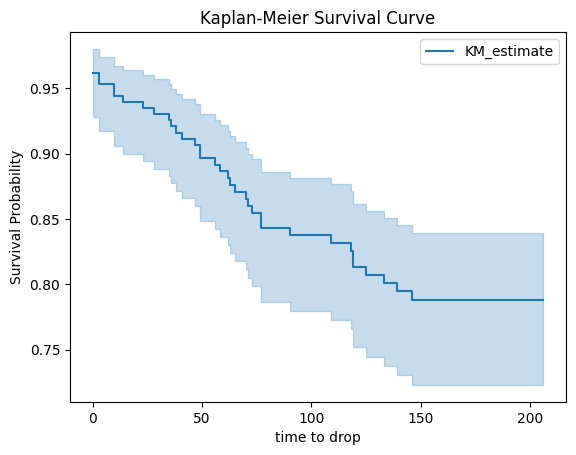

42

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(surv0_1['time1'], event_observed=surv0_1['이탈횟수'])
kmf.plot()

plt.xlabel('time to drop')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve')
plt.show()

len(surv1)

In [ ]:
surv0_1['censored'] = surv0_1.이탈횟수
surv0_1.to_csv('survival_data(for 0,1).csv')

In [ ]:
surv0_1

,user_idx,시작,끝,이탈횟수,time1,censored
0,10642,2023-03-06 14:46:22,2023-07-26 17:43:38,0,142,0
1,18597,2023-01-02 17:14:36,2023-07-26 17:24:23,0,205,0
2,35435,2023-01-20 12:16:51,2023-07-26 17:55:34,0,187,0
3,36836,2023-02-01 18:18:10,2023-07-26 17:43:11,0,174,0
4,46153,2023-01-01 11:00:52,2023-07-12 20:31:14,0,192,0
...,...,...,...,...,...,...
232,418079,2023-04-28 10:54:31,2023-06-14 21:53:15,1,47,1
233,419648,2023-04-26 15:36:13,2023-07-01 14:30:22,1,65,1
234,422949,2023-05-12 18:49:54,2023-06-20 17:35:48,1,38,1
235,431037,2023-05-31 16:21:30,2023-05-31 16:23:38,1,0,1


In [ ]:
# data table
# 1) (user id, bid)로 group by 해서 평균 duration / bid, level 붙이기
# -> (userid)groupby 평균 duration -> 페이지 별 duration
# 2) 이탈시간
stime.head()

,user_idx,bid,page,duration,read_time
0,10464,TPSRT138,1,823,2023-07-24 16:35:40
1,10464,TPSRT138,2,6808,2023-07-24 16:35:40
2,10464,TPSRT138,3,6808,2023-07-24 16:35:40
3,10464,TPSRT138,4,5650,2023-07-24 16:35:40
4,10464,TPSRT138,5,5650,2023-07-24 16:35:40


In [ ]:
%ls

'001_리딩앤 학습데이터_아이포트폴리오.xlsx'  'survival_data(for 0,1).csv'
'002_발음 분석 문장.csv'                      user.csv
'002_발음 분석 문장_level추가.csv'            week.csv
'003_페이지별 학습시간.csv'                  '레벨 dict.xlsx'
'1~5단계 완료 이력.csv'                      '월별 학습 통계.csv'
'2203 project.ipynb'                          이탈.ipynb
 2303project.ipynb                            읽은책권수.csv
 ds.csv                                       제공데이터요약.csv
 level_series.csv                            '주별 학습 통계.csv'
 survival.csv


In [ ]:
stime_week = pd.read_excel('001_리딩앤 학습데이터_아이포트폴리오.xlsx', sheet_name = '주별 학습 통계',header=1)
record = pd.read_excel('001_리딩앤 학습데이터_아이포트폴리오.xlsx', sheet_name = '1~5단계 완료 이력')

stime_month = pd.read_excel('001_리딩앤 학습데이터_아이포트폴리오.xlsx', sheet_name = '월별 학습 통계')
read_num = pd.read_excel('001_리딩앤 학습데이터_아이포트폴리오.xlsx', sheet_name = '읽은책권수')


In [ ]:
stime_week.head()

,사용자 아이디,주차,일요일,월요일,화요일,수요일,목요일,금요일,토요일
0,10464,202319,0,0,0,0,0,589,0
1,10464,202327,0,0,1145,667,0,0,0
2,10464,202328,0,666,0,0,0,0,0
3,10464,202330,0,1430,0,987,0,0,0
4,10642,202310,0,598,0,331,229,331,0


In [ ]:
record.head()

,id,도서 아이디,학습완료 단계 [1~5],학습일
0,10464,TPSRT132,1,2023-07-10 20:53:17
1,10464,TPSRT135,1,2023-07-10 20:47:54
2,10464,TPSRT138,1,2023-07-24 16:31:34
3,10464,TPSRT139,1,2023-07-24 10:59:50
4,10464,TPSRT141,1,2023-07-26 17:24:03


In [ ]:
stime_month.head()

,사용자 아이디,조회 월,1단계 학습 시간(초),2단계 학습 시간,3단계 학습 시간,4단계 학습 시간,5단계 학습 시간,월간 학습 일수,평균 발음 점수(0~1),학습 단어 수(3단계 완료한 도서의 단어 수 합),1~5단계 중 1단계 이상 완료 도서 수
0,10642,202303,1628,1191,1342,639,851,14,0.583992,36,14
1,10642,202304,1574,1550,1054,65,1497,17,0.683402,691,17
2,10642,202305,1100,804,534,18,932,12,0.000000,427,12
3,10642,202306,447,472,330,6,444,6,0.000000,301,6
4,36836,202302,2331,9867,11295,3983,2448,18,0.000000,346,19


In [ ]:

read_num.head()

,Unnamed: 0,사용자 아이디,읽은책권수
0,202303,10642,14
1,202304,10642,17
2,202305,10642,12
3,202306,10642,6
4,202302,36836,18


In [ ]:
stime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474680 entries, 0 to 1474679
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_idx   1474680 non-null  int64 
 1   bid        1474680 non-null  object
 2   page       1474680 non-null  int64 
 3   duration   1474680 non-null  int64 
 4   read_time  1474680 non-null  object
dtypes: int64(3), object(2)
memory usage: 56.3+ MB


In [ ]:
voice.info()
voice.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221030 entries, 0 to 221029
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_idx       221030 non-null  int64  
 1   bid            221030 non-null  object 
 2   series         221030 non-null  object 
 3   book_title     221030 non-null  object 
 4   level          221030 non-null  object 
 5   sentence       221030 non-null  object 
 6   recording_url  221030 non-null  object 
 7   average_score  221030 non-null  float64
 8   level_series   221030 non-null  object 
 9   level_real     221030 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 18.5+ MB


,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0


In [ ]:
voice['level_series'] = voice.series + '_' + voice.level
voice.head()

,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0


In [ ]:
# sample books 가 level 1인 증거
print(voice[voice.series == 'Sample Books'].bid.value_counts())
# voice[voice.series == 'Sample Books']
print(40225-38358)

TPSBS13S      38358
TPSLBS08S       413
TPSRT047S       217
TPSPW01S        209
TPSTT19S        140
TPSRT141S       123
TPSBS47S         87
TPSBC075S        84
TPSRT169S        82
TPSRT101S        72
TPSBAA2AS        62
TPSRT248S        62
TPSRT277S        43
TPSRT225S        40
TPSBC058S        38
TPSDP12S         36
TPSLG28S         22
TPSRI14S         21
TPSBC178S        21
TPSLBM01S        19
TPSRT315S        13
TPSRHK02AS       12
TPSBS90S         10
TPSHR02S          9
TPSRT290S         7
TPSBC333S         5
TPSRD29S          5
TPSCT20S          5
TPSBC238S         5
TPSLAA3S2S        5
Name: bid, dtype: int64
1867


In [ ]:
level_dict = {'Big Cat_Level 1': 1.0,
 'Big Cat_Level 2': 2.0,
 'Big Cat_Level 3': 3.0,
 'Big Cat_Level 4': 4.0,
 'Big Cat_Level 5': 5.0,
 'Big Cat_Level 6': 6.0,
 'Big Cat_Level 9': 7.0,
 'Big Cat_Level 8': 8.0,
 'Big Cat_Level 7': 9.0,
 'Big Cat_Level 10': 10.0,
 'Big Cat_Level 12': 11.0,
 'Big Cat_Level 11': 12.0,
 'Bob Books_Level 1': 1.0,
 'Bob Books_Level 2': 1.0,
 'Bob Books_Level 4': 1.0,
 'Bob Books_Level 5': 2.0,
 'Bob Books_Level 3': 1.0,
 'Bob Books_Level 9': 4.0,
 'Bob Books_Level 6': 2.0,
 'Bob Books_Level 7': 3.0,
 'Bob Books_Level 8': 3.0,
 'Classic Tales_Level 1': 4.5,
 'Classic Tales_Level 2': 6.5,
 'Classic Tales_Level 3': 8.0,
 'Classic Tales_Level 5': 10.0,
 'Classic Tales_Level 4': 9.0,
 'Dolphin Readers_Level 1': 2.5,
 'Dolphin Readers_Starter': 1.0,
 'Dolphin Readers_Level 2': 4.5,
 'Dolphin Readers_Level 3': 6.0,
 'Dolphin Readers_Level 4': 7.0,
 'Dominoes_Quick Starter': 6.5,
 'Dominoes_Level 3': 11.5,
 'Dominoes_Level 2': 10.0,
 'Happy Readers_Level 2': 5.0,
 'Happy Readers_Level 1': 3.5,
 'Happy Readers_Level 4': 7.0,
 'Happy Readers_Level 3': 6.0,
 'Happy Readers_Level 5': 8.0,
 'Happy Readers_Level 6': 9.0,
 'Ladybird Readers_Beginner': 1.0,
 'Ladybird Readers_Level 3': 4.0,
 'Ladybird Readers_Level 4': 5.0,
 'Ladybird Readers_Level 1': 2.0,
 'Ladybird Readers_Starter': 1.0,
 'Ladybird Readers_Level 2': 3.0,
 'Ladybird Readers_Level 5': 6.5,
 'Ladybird Readers_Level 6': 8.5,
 "Let's Go Readers_Begin": 1.0,
 "Let's Go Readers_Level 1": 2.5,
 "Let's Go Readers_Level 2": 4.5,
 "Let's Go Readers_Level 3": 6.0,
 "Let's Go Readers_Level 5": 8.0,
 "Let's Go Readers_Level 4": 7.0,
 "Let's Go Readers_Level 6": 9.0,
 'Look_Level 1': 3.0,
 'Look_Level 2': 4.0,
 'Look_Level 4': 7.0,
 'Look_Level 3': 5.5,
 'Look_Starter': 2.0,
 'Nursery Rhymes_Level 1': 2.0,
 'Nursery Rhymes_Level 2': 3.0,
 'Nursery Rhymes_Level 3': 4.0,
 'ORT: BCK_Level 1+': 1.0,
 'ORT: BCK_Level 3': 3.0,
 'ORT: BCK_Level 2': 2.0,
 'ORT: BCK_Level 4': 4.0,
 'ORT: BCK_Level 5': 5.0,
 'ORT: BCK_Level 6': 6.0,
 'ORT: BCK_Level 7': 7.0,
 'ORT: BCK_Level 8': 8.0,
 'ORT: BCK_Level 9': 9.0,
 'ORT: Explore_Level 3': 3.0,
 'ORT: Explore_Level 4': 4.0,
 'ORT: Explore_Level 1+': 1.0,
 'ORT: Explore_Level 2': 2.0,
 'ORT: Explore_Level 5': 5.0,
 'ORT: Explore_Level 6': 6.0,
 'ORT: Explore_Level 7': 7.0,
 'ORT: Explore_Level 9': 9.0,
 'ORT: inFact_Level 1+': 1.0,
 'ORT: inFact_Level 6': 6.0,
 'ORT: inFact_Level 4': 4.0,
 'ORT: inFact_Level 5': 5.0,
 'ORT: inFact_Level 3': 3.0,
 'ORT: inFact_Level 2': 2.0,
 'ORT: inFact_Level 7': 7.0,
 'ORT: inFact_Level 10': 0.0,
 'ORT: inFact_Level 8': 8.0,
 'ORT: Story Sparks_Level 1+': 1.0,
 'ORT: Story Sparks_Level 4': 4.0,
 'ORT: Story Sparks_Level 5': 5.0,
 'ORT: Story Sparks_Level 2': 2.0,
 'ORT: Story Sparks_Level 3': 3.0,
 'ORT: Story Sparks_Level 7': 7.0,
 'ORT: Story Sparks_Level 6': 6.0,
 'ORT: Traditional Tales_Level 2': 2.0,
 'ORT: Traditional Tales_Level 1+': 1.0,
 'ORT: Traditional Tales_Level 3': 3.0,
 'ORT: Traditional Tales_Level 5': 5.0,
 'ORT: Traditional Tales_Level 4': 4.0,
 'ORT: Traditional Tales_Level 6': 6.0,
 'ORT: Traditional Tales_Level 7': 7.0,
 'ORT: Traditional Tales_Level 8': 8.0,
 'ORT: Traditional Tales_Level 9': 9.0,
 'Our World_Level 2': 3.5,
 'Our World_Level 1': 2.0,
 'Our World_Level 3': 5.5,
 'Oxford Bookworms Library_Starter': 6.5,
 'Oxford Bookworms Library_Level 3': 11.5,
 'Oxford Bookworms Library_Level 6': 19.0,
 'Oxford Bookworms Library_Level 2': 10.0,
 'Oxford Bookworms Library_Level 4': 13.5,
 'Oxford Phonics World Readers_Level 1': 1.0,
 'Oxford Phonics World Readers_Level 2': 2.0,
 'Oxford Phonics World Readers_Level 3': 3.0,
 'Oxford Phonics World Readers_Level 4': 3.0,
 'Oxford Phonics World Readers_Level 5': 4.0,
 'Oxford Read and Discover_Level 1': 4.5,
 'Oxford Read and Discover_Level 4': 8.5,
 'Oxford Read and Discover_Level 5': 10.0,
 'Oxford Read and Discover_Level 2': 6.5,
 'Oxford Read and Discover_Level 3': 8.5,
 'Oxford Read and Discover_Level 6': 11.0,
 'Oxford Read and Imagine_Starter': 2.0,
 'Oxford Read and Imagine_Level 1': 4.5,
 'Oxford Read and Imagine_Beginner': 3.0,
 'Oxford Read and Imagine_Early Starter': 1.0,
 'Oxford Read and Imagine_Level 2': 6.5,
 'Oxford Read and Imagine_Level 3': 8.5,
 'Oxford Read and Imagine_Level 5': 10.0,
 'Oxford Read and Imagine_Level 4': 8.5,
 'Oxford Read and Imagine_Level 6': 11.0,
 'Peapod Readers_Level 1': 1.0,
 'Peapod Readers_Level 3': 3.0,
 'Peapod Readers_Level 4': 4.0,
 'Peapod Readers_Level 2': 2.0,
 'Peapod Readers_Level 5': 5.0,
 'Reach Higher_Level K': 1.5,
 'Reach Higher_Level 1A': 3.5,
 'Reach Higher_Level 1B': 3.5,
 'Reach Higher_Level 3B': 8.5,
 'Reach Higher_Level 2B': 6.0,
 'Read with Phinnie_Primary 1': 3.5,
 'Read with Phinnie_Primary 3': 6.0,
 'Read with Phinnie_Primary 2': 5.0,
 'Read with Phinnie_Primary 4': 7.0,
 'Read with Phinnie_Primary 5': 8.0,
 'Read with Phinnie_Primary 6': 9.0,
 'Reading Stars_Level 3': 1.0,
 'Reading Stars_Level 1': 1.0,
 'Reading Stars_Level 2': 1.0,
 'Sample Books_Bob Books': 1.0,
 'Tick-tock!_Level 1': 1.0,
 'Tick-tock!_Level 2': 2.0,
 'Tick-tock!_Level 3': 3.0,
 'Welcome to Our World_Level 1': 1.0,
 'Welcome to Our World_Level 2': 1.0,
 'Welcome to Our World_Level 3': 2.0,
 'Sample Books_ORT: BCK': 1.0,
 'Sample Books_Oxford Readers Collection': 1.0,
 'Sample Books_Ladybird Readers': 1.0,
 'Sample Books_Big Cat': 1.0,
 'Sample Books_National Geographic Learning': 1.0}


In [ ]:
voice['level_real'] =voice.level_series.apply(lambda x: level_dict[x] if x in level_dict else None)
voice.head()

,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0


In [ ]:
voice.to_csv('002_발음 분석 문장_level추가.csv')

In [ ]:
len(voice)
voice.shape

(221030, 10)

In [ ]:
level_ser = pd.DataFrame(voice.level_series.value_counts())
level_ser.to_csv('level_series.csv')

# 이탈기준
- 7일이상 안들어옴 (6월 30일까지) => resume기간 정해서 하기
(train: ~6/30)



# issues
- stime.read_time>datetime으로 바꾸기
- stime.read_time을 user별로 min, max뽑아서 기간 뽑아내기=> time to 이탈 뽑기


# to-do
- level 통일 (전처리)
- resume 기간 커트라인 정하기
  - stime.read_time을 user별로 min, max뽑아서 기간 뽑아내기=> time to 이탈 뽑기
  - 절단여부 표시
-  가능한 feature후보: 읽은 책 종류, average_score, 마지막 직전 단계, 평균발음점수, 단계별 학습시간, 접속꾸준히 하는지(접속주기(요일반영)) , 접속시간대's fluctuation


In [ ]:
%ls

summary = pd.read_csv('제공데이터요약.csv')
summary

'001_리딩앤 학습데이터_아이포트폴리오.xlsx'  'survival_data(for 0,1).csv'
'002_발음 분석 문장.csv'                      user.csv
'002_발음 분석 문장_level추가.csv'            week.csv
'003_페이지별 학습시간.csv'                  '레벨 dict.xlsx'
'1~5단계 완료 이력.csv'                      '월별 학습 통계.csv'
'2203 project.ipynb'                          이탈.ipynb
 2303project.ipynb                            읽은책권수.csv
 ds.csv                                       제공데이터요약.csv
 level_series.csv                            '주별 학습 통계.csv'
 survival.csv


,데이터 카테고리,설명,기준단위,데이터유형,비고
0,읽은책 목록,학습자가 특정기간 동안 읽은 책 리스트,월별,도서명,NaN
1,_x0008_월별 학습통계,특정 학습자의 월 기준 통계,월별,단계별 학습시간,각 단계별 (1~5단계) 로 접속한 시간
2,_x0008_월별 학습통계,특정 학습자의 월 기준 통계,월별,월간 학습일수,월 기준 접속한 일수
3,_x0008_월별 학습통계,특정 학습자의 월 기준 통계,월별,평균 발음 점수,4단계 발음 평가 평균 점수
4,_x0008_월별 학습통계,특정 학습자의 월 기준 통계,월별,학습 단어수,해당 월에 학습자가 완료한 3단계에 등장한 단어의 총합
5,_x0008_월별 학습통계,특정 학습자의 월 기준 통계,월별,완료도서수,5단계 중 한 단계라도 완료시 카운트됨
6,1~5단계 완료이력,특정 학습자가 특정 도서의 특정 단계를 완료한 일시,일별,완료일,NaN
7,주별학습통계,특정 학습자가 주별로 책을 읽은 시간,주별,학습시간,월~일요일 기준 책을 읽은 시간 (3단계 접속시간)
8,발음 분석 문장,4단계 문장별 발음 녹음 결과,-,발음 분석 점수,NaN
9,페이지별 학습시간,특정 도서의 각 페이지별로 학습하는데 걸리는 시간,-,학습시간,NaN


# 월별 유저별 읽은 책 권수

In [ ]:
num_read = pd.read_csv('읽은책권수.csv')
num_read.rename(columns={'Unnamed: 0': 'Date', '사용자 아이디': 'UID', '읽은책권수':'Num_read'}, inplace=True)
num_read

,Date,UID,Num_read
0,202303,10642,14
1,202304,10642,17
2,202305,10642,12
3,202306,10642,6
4,202302,36836,18
...,...,...,...
846,202306,434770,3
847,202306,435172,43
848,202306,435741,24
849,202306,435834,6


<ipython-input-64-8e3df1947bec>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


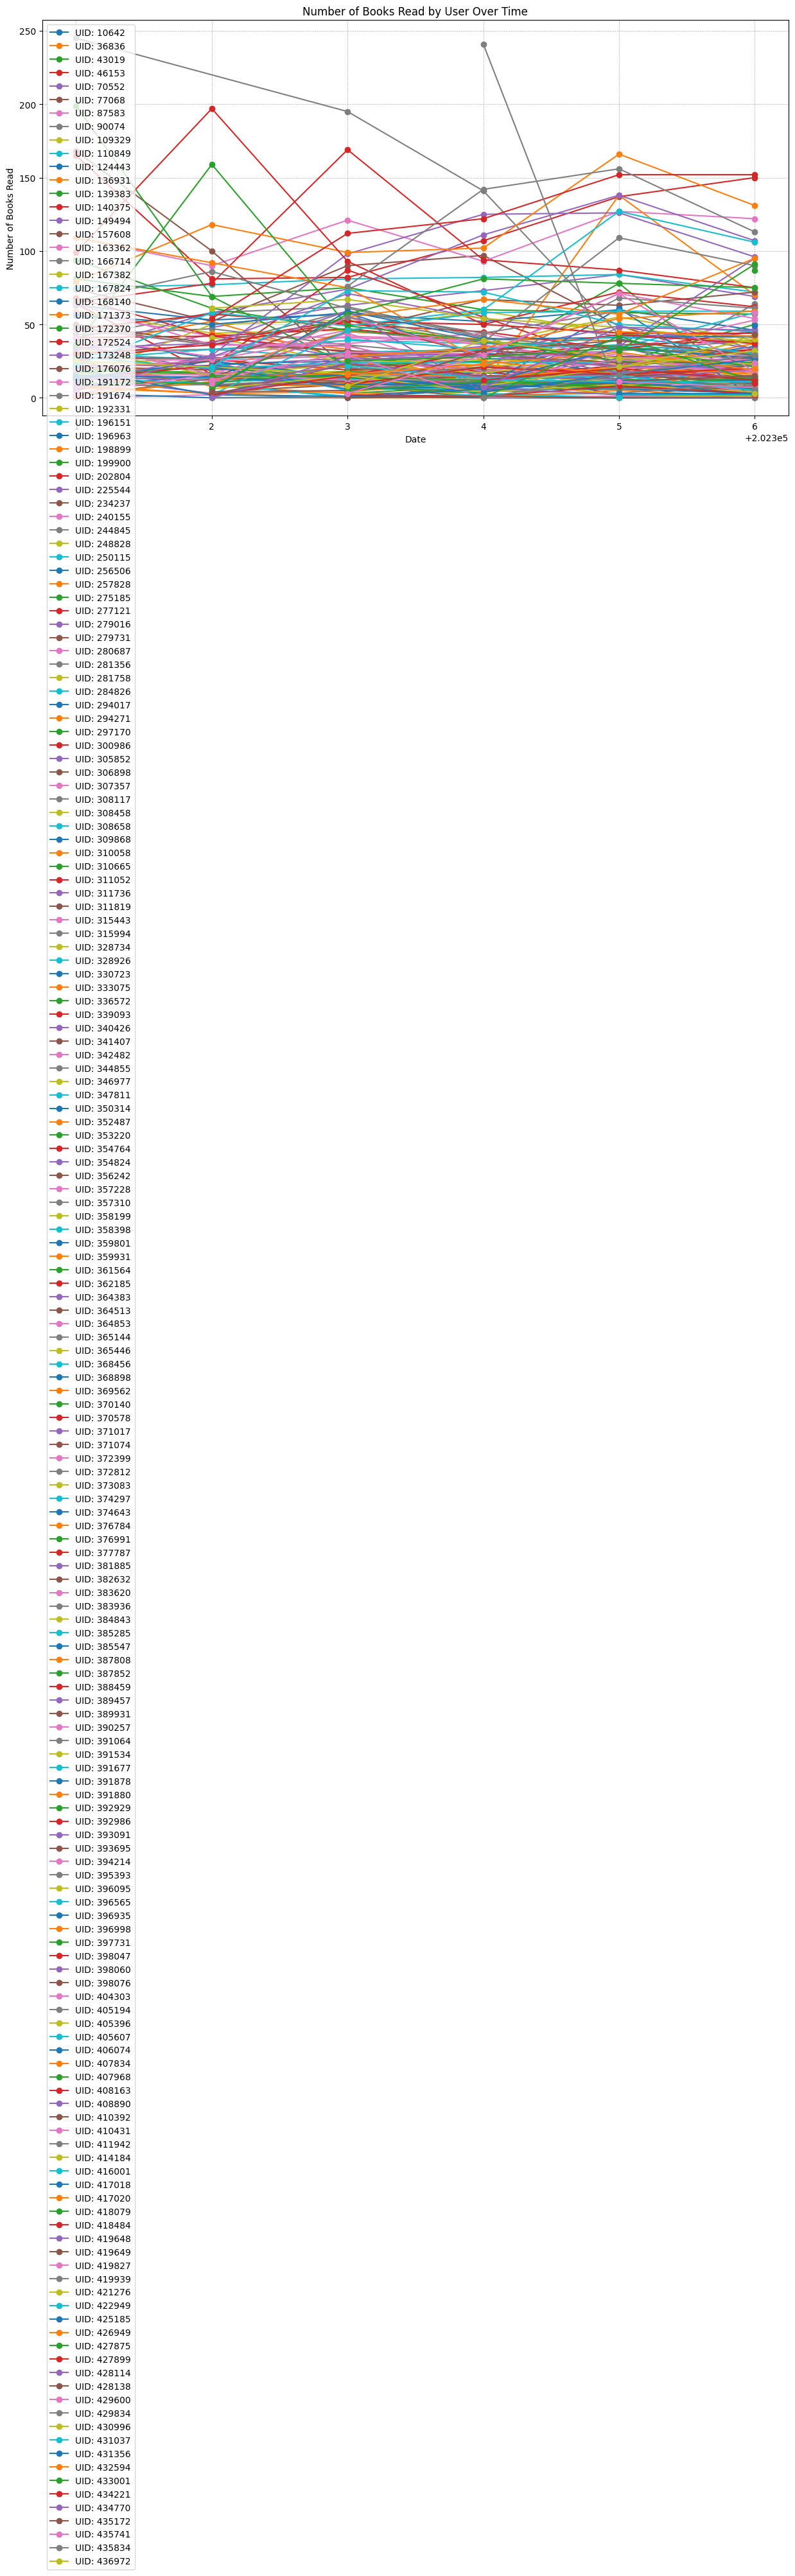

In [ ]:
import matplotlib.pyplot as plt
# 영문 제목으로 그래프 다시 그리기
avg_read = num_read.groupby('Date')['Num_read'].mean()
plt.figure(figsize=(15, 8))

for uid, group in num_read.groupby('UID'):
    plt.plot(group['Date'], group['Num_read'], label=f'UㅌID: {uid}', marker='o')

plt.title('Number of Books Read by User Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Books Read')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


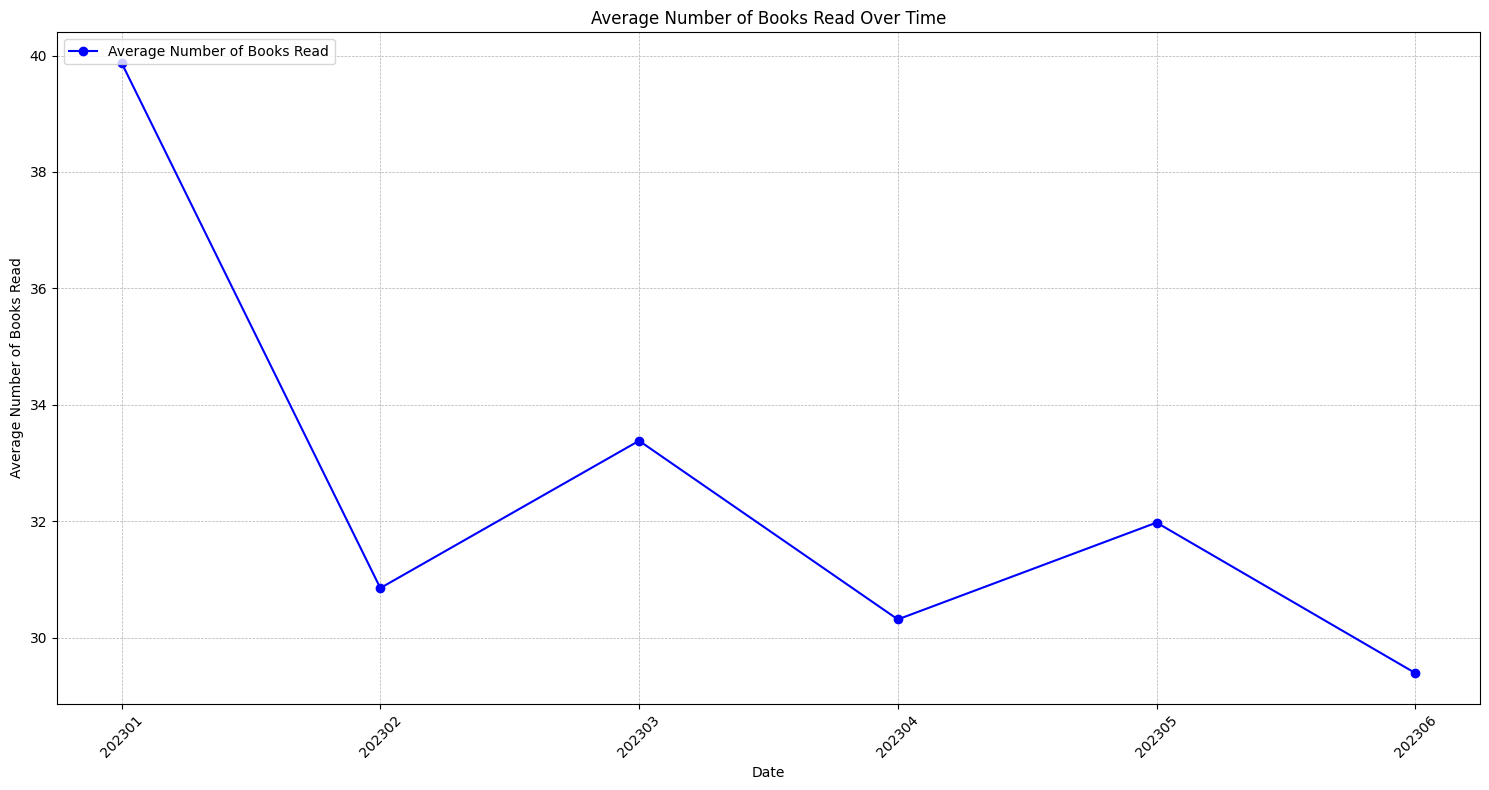

In [ ]:
# Date 컬럼을 문자열 형태로 변환
avg_read.index = avg_read.index.astype(str)

plt.figure(figsize=(15, 8))
plt.plot(avg_read.index, avg_read.values, marker='o', color='blue', label='Average Number of Books Read')

plt.title('Average Number of Books Read Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Books Read')
plt.xticks(rotation=45)  # x축 라벨을 회전하여 표시
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# 월간 통계

![image.png](attachment:image.png)

In [ ]:
monthly_stats= pd.read_csv('월별 학습 통계.csv')
monthly_stats

,사용자 아이디,조회 월,1단계 학습 시간(초),2단계 학습 시간,3단계 학습 시간,4단계 학습 시간,5단계 학습 시간,월간 학습 일수,평균 발음 점수(0~1),학습 단어 수(3단계 완료한 도서의 단어 수 합),1~5단계 중 1단계 이상 완료 도서 수
0,10642,202303,1628,1191,1342,639,851,14,0.583992,36,14
1,10642,202304,1574,1550,1054,65,1497,17,0.683402,691,17
2,10642,202305,1100,804,534,18,932,12,0.000000,427,12
3,10642,202306,447,472,330,6,444,6,0.000000,301,6
4,36836,202302,2331,9867,11295,3983,2448,18,0.000000,346,19
...,...,...,...,...,...,...,...,...,...,...,...
846,434770,202306,597,1283,6893,951,758,8,0.492449,869,3
847,435172,202306,545,2743,10970,4508,38,6,0.859362,13693,45
848,435741,202306,4174,2691,3466,9917,3233,8,0.635989,1061,31
849,435834,202306,861,512,7610,574,1098,4,0.617627,205,6


In [ ]:
weekly_stats = pd.read_csv('주별 학습 통계.csv')
weekly_stats

,Unnamed: 0,요일별 3단계 학습 시간 (초),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,사용자 아이디,주차,일요일,월요일,화요일,수요일,목요일,금요일,토요일
1,10464,202319,0,0,0,0,0,589,0
2,10464,202327,0,0,1145,667,0,0,0
3,10464,202328,0,666,0,0,0,0,0
4,10464,202330,0,1430,0,987,0,0,0
...,...,...,...,...,...,...,...,...,...
4073,441602,202330,8,319,0,1469,0,0,0
4074,442058,202330,0,0,0,1463,0,0,0
4075,442182,202330,0,0,1988,2823,0,0,0
4076,442454,202330,0,0,0,882,0,0,0


In [ ]:
df_2

,Unnamed: 0,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0
...,...,...,...,...,...,...,...,...,...,...,...
221025,221025,442501,TPSTT01,Tick-tock!,At school,Level 1,I read at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.755011,Tick-tock!_Level 1,1.0
221026,221026,442501,TPSTT01,Tick-tock!,At school,Level 1,I sing at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.528463,Tick-tock!_Level 1,1.0
221027,221027,442503,TPSTT01,Tick-tock!,At school,Level 1,I sing at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.695023,Tick-tock!_Level 1,1.0
221028,221028,442503,TPSTT01,Tick-tock!,At school,Level 1,I eat at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.736908,Tick-tock!_Level 1,1.0


In [ ]:
df_3

,user_idx,bid,page,duration,read_time
0,10464,TPSRT138,1,823,2023-07-24 16:35:40
1,10464,TPSRT138,2,6808,2023-07-24 16:35:40
2,10464,TPSRT138,3,6808,2023-07-24 16:35:40
3,10464,TPSRT138,4,5650,2023-07-24 16:35:40
4,10464,TPSRT138,5,5650,2023-07-24 16:35:40
...,...,...,...,...,...
1474675,436972,TPSBS02,16,1054,2023-07-25 14:04:28
1474676,436972,TPSBS01,16,2071,2023-07-26 17:42:34
1474677,436972,TPSBS01,16,2450,2023-07-27 18:02:50
1474678,436972,TPSBS01,16,1806,2023-08-01 17:37:53


In [ ]:
# Summary statistics for the third file
summary_3 = df_3.describe(include='all')

# Information about the data types and missing values
info_3 = df_3.info()

summary_3, info_3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474680 entries, 0 to 1474679
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_idx   1474680 non-null  int64 
 1   bid        1474680 non-null  object
 2   page       1474680 non-null  int64 
 3   duration   1474680 non-null  int64 
 4   read_time  1474680 non-null  object
dtypes: int64(3), object(2)
memory usage: 56.3+ MB


(            user_idx       bid          page      duration  \
 count   1.474680e+06   1474680  1.474680e+06  1.474680e+06   
 unique           NaN      2255           NaN           NaN   
 top              NaN  TPSRT072           NaN           NaN   
 freq             NaN      7712           NaN           NaN   
 mean    3.231699e+05       NaN  1.172231e+01  1.253614e+04   
 std     1.020564e+05       NaN  8.144252e+00  3.580369e+05   
 min     1.046400e+04       NaN  0.000000e+00  0.000000e+00   
 25%     2.790160e+05       NaN  6.000000e+00  4.440000e+02   
 50%     3.643830e+05       NaN  1.000000e+01  2.096000e+03   
 75%     3.965650e+05       NaN  1.600000e+01  7.820000e+03   
 max     4.425030e+05       NaN  1.460000e+02  1.734827e+08   
 
                   read_time  
 count               1474680  
 unique               117640  
 top     2023-06-08 18:03:06  
 freq                    454  
 mean                    NaN  
 std                     NaN  
 min                     

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

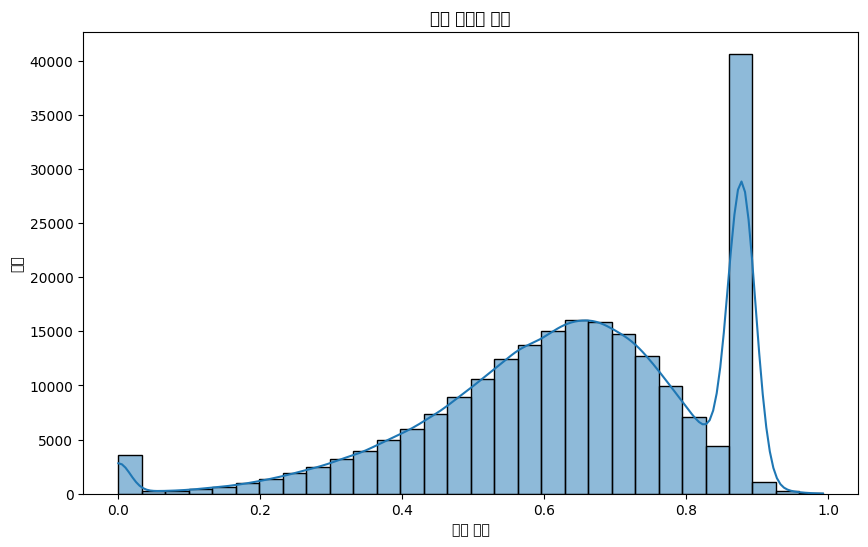

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

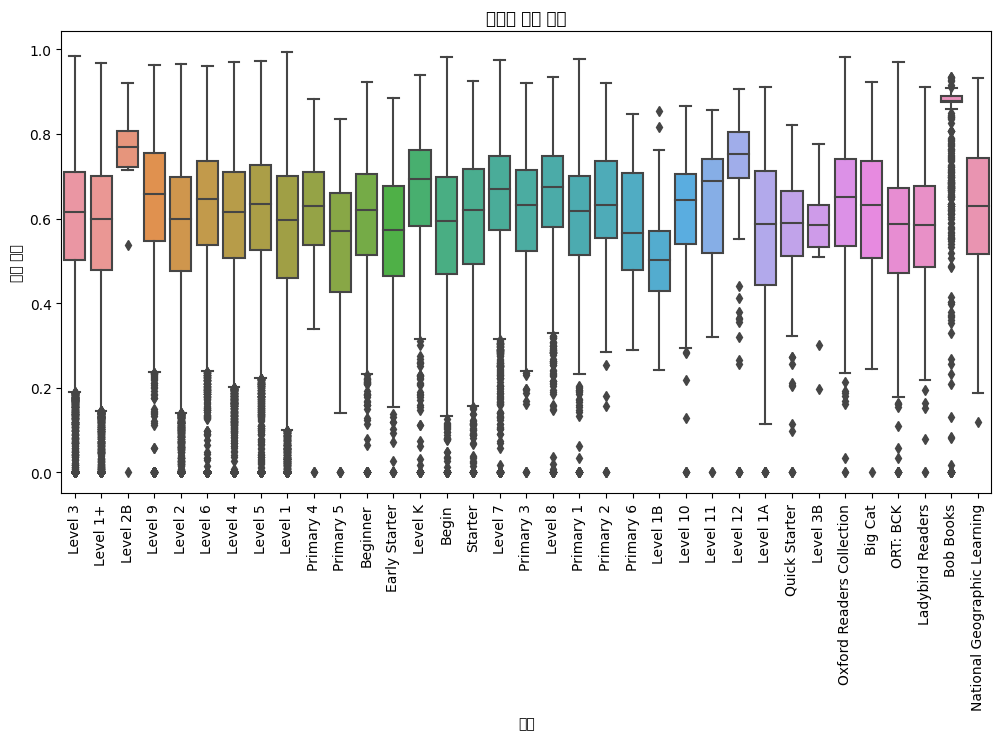

In [ ]:
# Plotting the distribution of average_score
plt.figure(figsize=(10, 6))
sns.histplot(data=df_2, x='average_score', bins=30, kde=True)
plt.title('평균 점수의 분포')
plt.xlabel('평균 점수')
plt.ylabel('빈도')
plt.show()

# Plotting the average score by level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2, x='level', y='average_score')
plt.title('레벨별 평균 점수')
plt.xlabel('레벨')
plt.ylabel('평균 점수')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54168 (\N{HANGUL SYLLABLE PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyth

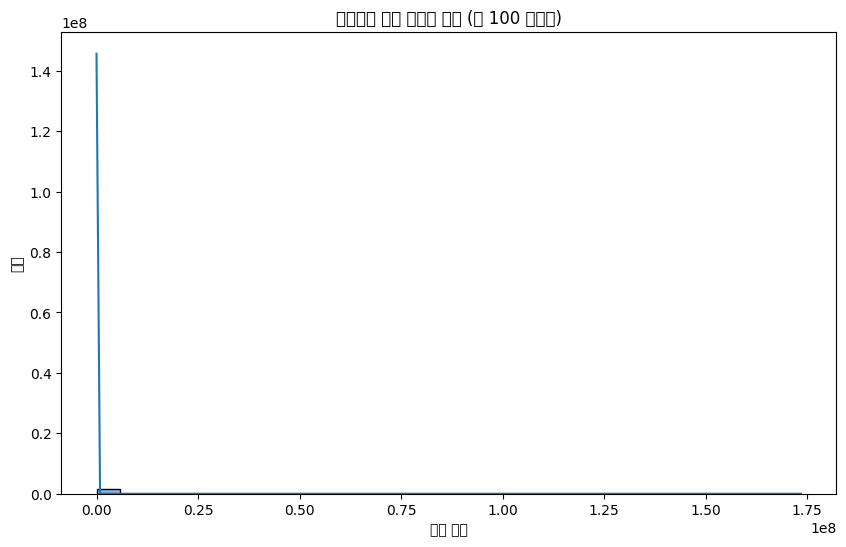

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54168 (\N{HANGUL SYLLABLE PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51069 (\N{HANGUL SYLLABLE ILG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyth

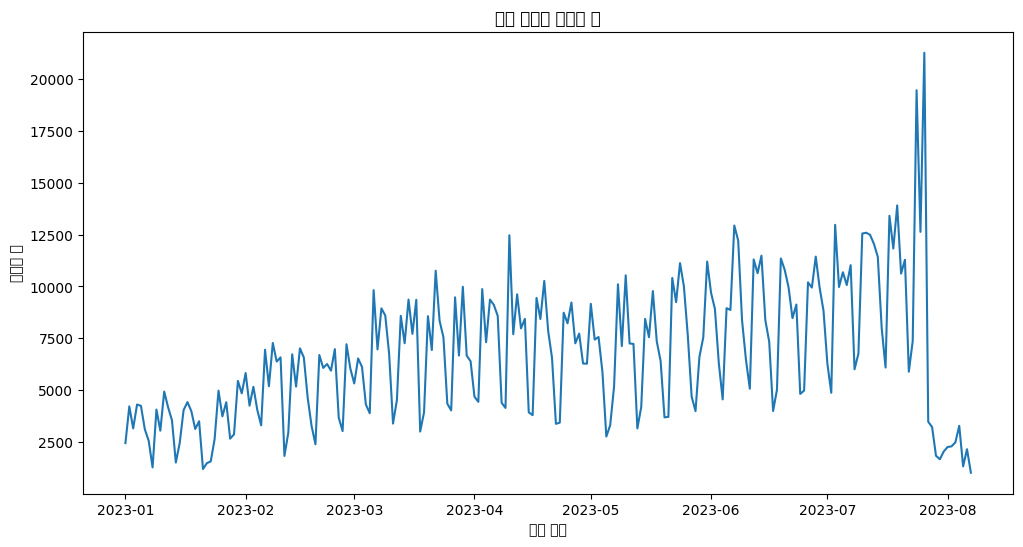

In [ ]:
# Plotting the distribution of duration for the first 100 pages
plt.figure(figsize=(10, 6))
sns.histplot(data=df_3[df_3['page'] <= 100], x='duration', bins=30, kde=True)
plt.title('페이지별 지속 시간의 분포 (첫 100 페이지)')
plt.xlabel('지속 시간')
plt.ylabel('빈도')
plt.show()

# Converting read_time to datetime
df_3['read_time'] = pd.to_datetime(df_3['read_time'])

# Resampling by day and counting the number of pages read
daily_read_pages = df_3.resample('D', on='read_time')['page'].count().reset_index()

# Plotting the number of pages read over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_read_pages, x='read_time', y='page')
plt.title('읽은 시간별 페이지 수')
plt.xlabel('읽은 시간')
plt.ylabel('페이지 수')
plt.show()


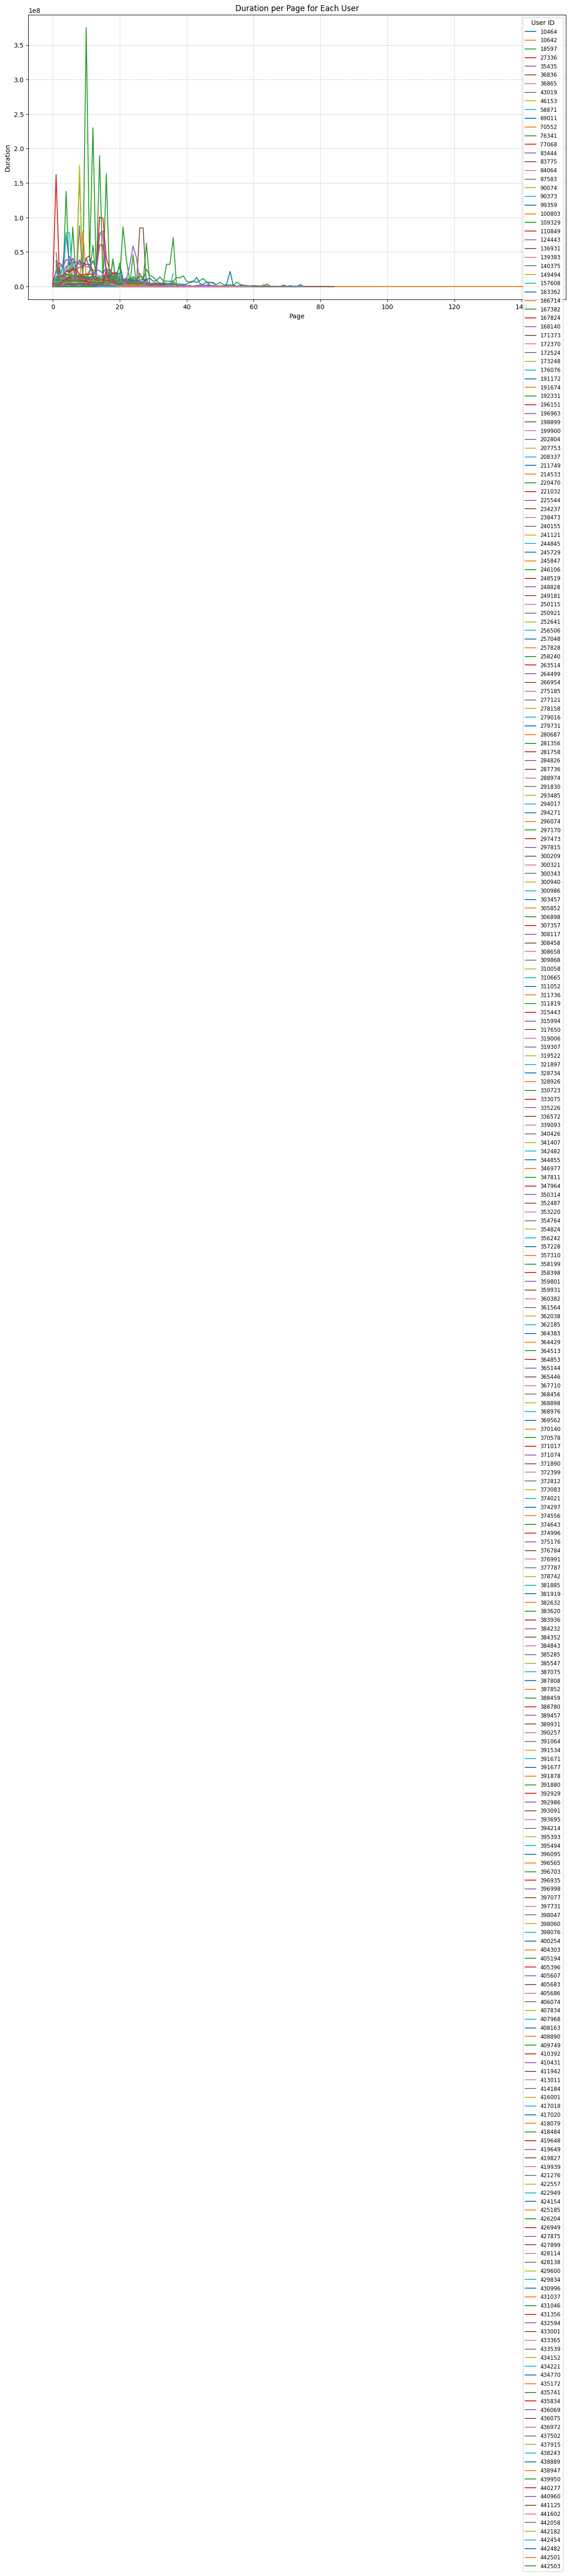

In [ ]:


plt.figure(figsize=(15, 8))

# Group by user_idx and page, then sum duration for each page per user
grouped = df_3.groupby(['user_idx', 'page']).duration.sum().unstack()

for user in grouped.index:
    plt.plot(grouped.columns, grouped.loc[user], label=user)

plt.xlabel("Page")
plt.ylabel("Duration")
plt.title("Duration per Page for Each User")
plt.legend(loc="upper right", fontsize='small', title="User ID")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()


<ipython-input-75-125b645302d8>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_3, x='page', y='duration', ci='sd', label="Average Duration with 95% CI")


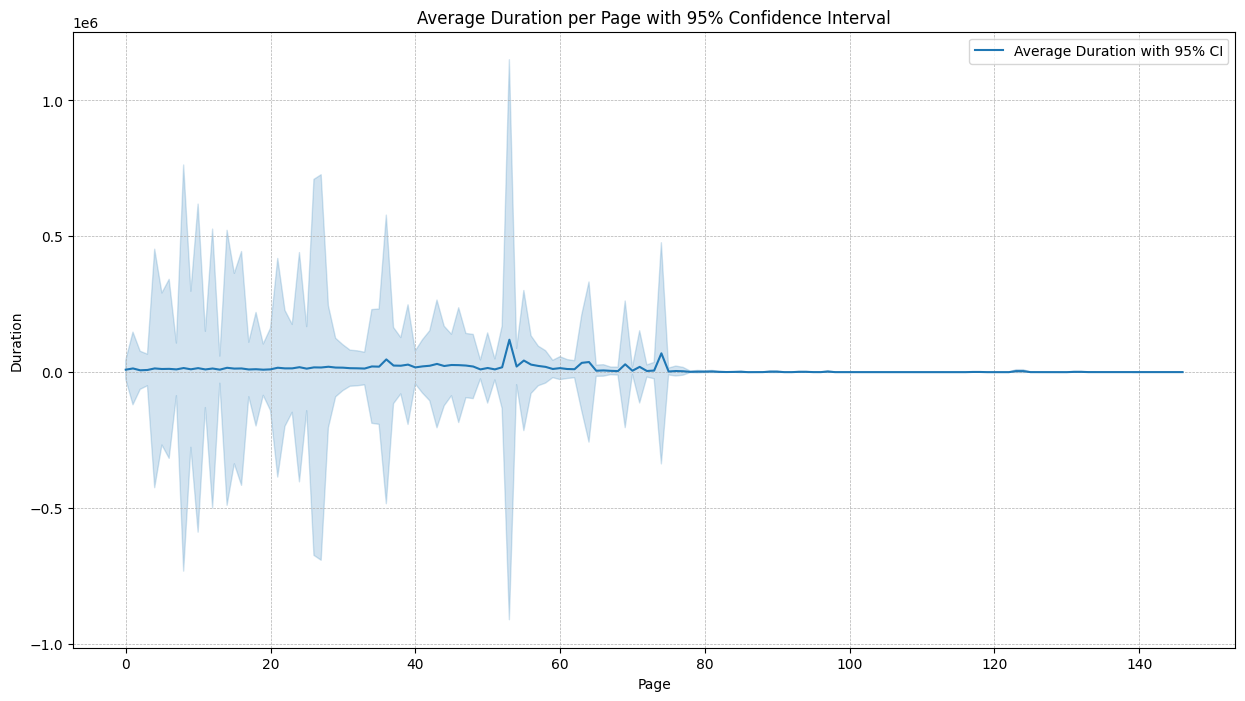

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_3, x='page', y='duration', ci='sd', label="Average Duration with 95% CI")

plt.xlabel("Page")
plt.ylabel("Duration")
plt.title("Average Duration per Page with 95% Confidence Interval")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

plt.show()



In [ ]:
#가능한 feature후보: 읽은 책 종류, average_score, 마지막 직전 단계, 평균발음점수, 단계별 학습시간, 접속꾸준히 하는지(접속주기(요일반영)) , 접속시간대's fluctuation

In [ ]:
step = pd.read_csv('/content/drive/MyDrive/edutech/1~5단계 완료 이력.csv')
step.head()

,id,도서 아이디,학습완료 단계 [1~5],학습일
0,10464,TPSRT132,1,2023-07-10 20:53:17
1,10464,TPSRT135,1,2023-07-10 20:47:54
2,10464,TPSRT138,1,2023-07-24 16:31:34
3,10464,TPSRT139,1,2023-07-24 10:59:50
4,10464,TPSRT141,1,2023-07-26 17:24:03


In [ ]:
level = pd.read_csv('/content/drive/MyDrive/edutech/002_발음 분석 문장_level추가.csv')
level.head()

,Unnamed: 0,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0


In [ ]:
sorted_level = level.sort_values(by=['user_idx', 'level_real'])

In [ ]:
sorted_level[:30]

,Unnamed: 0,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0
5,5,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,Wilf and Wilma were at the pond.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.645581,ORT: BCK_Level 3,3.0
6,6,10464,TPSRT153,ORT: BCK,Sniff,Level 3,The puppy was excited.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.694853,ORT: BCK_Level 3,3.0
7,7,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Then Sniff went in the mud.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.466475,ORT: BCK_Level 3,3.0
8,8,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,The children made six ducks.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.520995,ORT: BCK_Level 3,3.0
9,9,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Wilma had an idea.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.726364,ORT: BCK_Level 3,3.0


In [ ]:
# Creating a new dataframe 'user' and computing the average score for each user
user = sorted_level.groupby('user_idx')['average_score'].mean().reset_index()
user.columns = ['user_idx', 'average_score']

# Displaying the first few rows of the 'user' dataframe
user.head()


,user_idx,average_score
0,10464,0.633982
1,10642,0.593613
2,18597,0.693457
3,27336,0.552755
4,35435,0.566679


In [ ]:
# Calculating absolute score increase for each user
# The approach is to subtract the first score from the last score

def compute_absolute_score_increase(group):
    if len(group) > 1:
        return group.iloc[-1] - group.iloc[0]
    else:
        return 0

absolute_score_increase = sorted_level.groupby('user_idx')['average_score'].apply(compute_absolute_score_increase).reset_index()
absolute_score_increase.columns = ['user_idx', 'absolute_score_increase']

# Merging the absolute score increase into the 'user' dataframe
user = user.merge(absolute_score_increase, on='user_idx', how='left')

# Displaying the updated 'user' dataframe
user.head()


,user_idx,average_score,absolute_score_increase
0,10464,0.633982,0.010300
1,10642,0.593613,0.001897
2,18597,0.693457,0.137474
3,27336,0.552755,-0.776648
4,35435,0.566679,-0.256515


In [ ]:
# Finding the level with the highest count (i.e., most frequently read) for each user
most_frequent_level = sorted_level.groupby('user_idx')['level_real'].apply(lambda x: x.value_counts().idxmax()).reset_index()
most_frequent_level.columns = ['user_idx', 'most_frequent_level']

# Merging the most frequent level into the 'user' dataframe
user = user.merge(most_frequent_level, on='user_idx', how='left')

# Displaying the updated 'user' dataframe
user.head()


,user_idx,average_score,absolute_score_increase,most_frequent_level
0,10464,0.633982,0.010300,3.0
1,10642,0.593613,0.001897,1.0
2,18597,0.693457,0.137474,6.0
3,27336,0.552755,-0.776648,2.0
4,35435,0.566679,-0.256515,4.0


In [ ]:
# Calculating total number of books read by each user
total_books_read = sorted_level.groupby('user_idx')['book_title'].count().reset_index()
total_books_read.columns = ['user_idx', 'total_books_read']

# Merging the total number of books read into the 'user' dataframe
user = user.merge(total_books_read, on='user_idx', how='left')

# Displaying the updated 'user' dataframe
user.head()


,user_idx,average_score,absolute_score_increase,most_frequent_level,total_books_read
0,10464,0.633982,0.010300,3.0,90
1,10642,0.593613,0.001897,1.0,62
2,18597,0.693457,0.137474,6.0,28
3,27336,0.552755,-0.776648,2.0,203
4,35435,0.566679,-0.256515,4.0,604


In [ ]:
ds.head()

,index,user_idx,bid,page,duration,read_time,time_diff
0,83,10464,TPSRT181,1,1366,2023-01-05 20:11:40,NaN
1,84,10464,TPSRT181,2,13330,2023-01-05 20:12:07,27.0
2,85,10464,TPSRT181,3,13331,2023-01-05 20:12:07,0.0
3,86,10464,TPSRT181,2,1250,2023-01-05 20:12:11,4.0
4,87,10464,TPSRT181,3,1252,2023-01-05 20:12:11,0.0


In [ ]:
df_2

,Unnamed: 0,user_idx,bid,series,book_title,level,sentence,recording_url,average_score,level_series,level_real
0,0,10464,TPSRT153,ORT: BCK,Sniff,Level 3,They took Sniff to the park.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.618048,ORT: BCK_Level 3,3.0
1,1,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,A frog hopped out.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.616139,ORT: BCK_Level 3,3.0
2,2,10464,TPSRT152,ORT: BCK,Pond Dipping,Level 3,They pulled the net.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.632906,ORT: BCK_Level 3,3.0
3,3,10464,TPSRT155,ORT: BCK,The Duck Race,Level 3,Two swans flew down.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.760200,ORT: BCK_Level 3,3.0
4,4,10464,TPSRT153,ORT: BCK,Sniff,Level 3,Sniff liked to roll on her back.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.609102,ORT: BCK_Level 3,3.0
...,...,...,...,...,...,...,...,...,...,...,...
221025,221025,442501,TPSTT01,Tick-tock!,At school,Level 1,I read at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.755011,Tick-tock!_Level 1,1.0
221026,221026,442501,TPSTT01,Tick-tock!,At school,Level 1,I sing at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.528463,Tick-tock!_Level 1,1.0
221027,221027,442503,TPSTT01,Tick-tock!,At school,Level 1,I sing at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.695023,Tick-tock!_Level 1,1.0
221028,221028,442503,TPSTT01,Tick-tock!,At school,Level 1,I eat at school.,https://s3.ap-northeast-2.amazonaws.com/tapas-...,0.736908,Tick-tock!_Level 1,1.0


In [ ]:
# Calculate entropy for a given probability distribution
def entropy(p):
    p = p[p > 0]  # filter out zero probabilities to avoid log(0)
    return -np.sum(p * np.log2(p))

# Calculate the series diversity entropy for each user
def series_diversity_entropy(df):
    # Count the series frequency for each user
    series_counts = df.groupby('user_idx')['series'].value_counts(normalize=True)

    # Calculate entropy for each user
    entropies = series_counts.groupby('user_idx').apply(entropy)

    return entropies

user_entropies = series_diversity_entropy(df_2)
user_entropies

user_idx
10464    -0.000000
10642    -0.000000
18597     1.405172
27336     0.139778
35435     0.080354
            ...   
442058    0.702467
442182    2.075923
442454    1.000000
442501   -0.000000
442503   -0.000000
Name: series, Length: 285, dtype: float64

In [ ]:
user = user.merge(user_entropies.reset_index(), on='user_idx', how='left')
user = user.rename(columns={'series': 'series_diversity'})

user.head()

,user_idx,average_score,absolute_score_increase,most_frequent_level,total_books_read,series_diversity
0,10464,0.633982,0.010300,3.0,90,-0.000000
1,10642,0.593613,0.001897,1.0,62,-0.000000
2,18597,0.693457,0.137474,6.0,28,1.405172
3,27336,0.552755,-0.776648,2.0,203,0.139778
4,35435,0.566679,-0.256515,4.0,604,0.080354


In [ ]:
# Calculate the level difference between the minimum and maximum level for each user
min_level = df_2.groupby('user_idx')['level_real'].min()
max_level = df_2.groupby('user_idx')['level_real'].max()

level_difference = max_level - min_level

# Update the level change values in the user dataframe based on user_idx
user['level_variation'] = user['user_idx'].map(level_difference)

user.head()


,user_idx,average_score,absolute_score_increase,most_frequent_level,total_books_read,series_diversity,level_variation
0,10464,0.633982,0.010300,3.0,90,-0.000000,0.0
1,10642,0.593613,0.001897,1.0,62,-0.000000,0.0
2,18597,0.693457,0.137474,6.0,28,1.405172,1.5
3,27336,0.552755,-0.776648,2.0,203,0.139778,10.0
4,35435,0.566679,-0.256515,4.0,604,0.080354,3.0


In [ ]:
# Calculate the total number of books read by each user
total_books_read = df_2.groupby('user_idx').size()

# Add the total_books_read values to the user dataframe
user['Total_Books_Read'] = user['user_idx'].map(total_books_read)

user.head()


,user_idx,average_score,absolute_score_increase,most_frequent_level,total_books_read,series_diversity,level_variation,Total_Books_Read
0,10464,0.633982,0.010300,3.0,90,-0.000000,0.0,90
1,10642,0.593613,0.001897,1.0,62,-0.000000,0.0,62
2,18597,0.693457,0.137474,6.0,28,1.405172,1.5,28
3,27336,0.552755,-0.776648,2.0,203,0.139778,10.0,203
4,35435,0.566679,-0.256515,4.0,604,0.080354,3.0,604


In [ ]:
# Calculate the number of books completed for each step by each user
step_counts = step.groupby(['id', '학습완료 단계 [1~5]']).size().unstack().fillna(0)

# Merge the step counts into the user dataframe based on user_idx (id)
user = user.merge(step_counts, left_on='user_idx', right_on='id', how='left').fillna(0)

# Rename the columns for clarity
user = user.rename(columns={1: 'Step_1_Books', 2: 'Step_2_Books', 3: 'Step_3_Books', 4: 'Step_4_Books', 5: 'Step_5_Books'})

user.head()


,user_idx,average_score,absolute_score_increase,most_frequent_level,total_books_read,series_diversity,level_variation,Total_Books_Read,Step_1_Books,Step_2_Books,Step_3_Books,Step_4_Books,Step_5_Books
0,10464,0.633982,0.010300,3.0,90,-0.000000,0.0,90,16.0,16.0,7.0,17.0,17.0
1,10642,0.593613,0.001897,1.0,62,-0.000000,0.0,62,59.0,61.0,59.0,4.0,56.0
2,18597,0.693457,0.137474,6.0,28,1.405172,1.5,28,13.0,40.0,67.0,16.0,13.0
3,27336,0.552755,-0.776648,2.0,203,0.139778,10.0,203,76.0,193.0,114.0,94.0,76.0
4,35435,0.566679,-0.256515,4.0,604,0.080354,3.0,604,135.0,716.0,273.0,148.0,219.0


In [ ]:
 # 첫 번째 행의 값을 열 이름으로 설정
weekly_stats.columns = weekly_stats.iloc[0]

# 첫 번째 행 제거
weekly_stats = weekly_stats.drop(weekly_stats.index[0])
weekly_stats

,사용자 아이디,주차,일요일,월요일,화요일,수요일,목요일,금요일,토요일
1,10464,202319,0,0,0,0,0,589,0
2,10464,202327,0,0,1145,667,0,0,0
3,10464,202328,0,666,0,0,0,0,0
4,10464,202330,0,1430,0,987,0,0,0
5,10642,202310,0,598,0,331,229,331,0
...,...,...,...,...,...,...,...,...,...
4073,441602,202330,8,319,0,1469,0,0,0
4074,442058,202330,0,0,0,1463,0,0,0
4075,442182,202330,0,0,1988,2823,0,0,0
4076,442454,202330,0,0,0,882,0,0,0


In [ ]:
weekly_stats.head()
csv_path = "/content/drive/MyDrive/edutech/week.csv"

weekly_stats.to_csv(csv_path, index=False)

In [ ]:

unique_user_ids_count = weekly_stats['사용자 아이디'].nunique()
unique_user_ids_count
weekly_stats.head()

,사용자 아이디,주차,일요일,월요일,화요일,수요일,목요일,금요일,토요일
1,10464,202319,0,0,0,0,0,589,0
2,10464,202327,0,0,1145,667,0,0,0
3,10464,202328,0,666,0,0,0,0,0
4,10464,202330,0,1430,0,987,0,0,0
5,10642,202310,0,598,0,331,229,331,0


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("week.csv")

# Calculate the total study time for each week per user
df['total_time'] = df.iloc[:, 2:9].sum(axis=1)

# Calculate the ratio of total_time to max_time for each week per user
df['max_time'] = df.iloc[:, 2:].max(axis=1)
df['total_max_ratio'] = df['max_time']/df['total_time']
# Calculate the average ratio of total_time to max_time for each user across all weeks
average_total_max_ratio = df.groupby('사용자 아이디')['total_max_ratio'].mean().reset_index()




,사용자 아이디,total_max_ratio
0,10464,1.0
1,10642,1.0
2,18597,1.0
3,27336,1.0
4,35435,1.0


In [ ]:
ds.head()

,index,user_idx,bid,page,duration,read_time,time_diff
0,83,10464,TPSRT181,1,1366,2023-01-05 20:11:40,NaN
1,84,10464,TPSRT181,2,13330,2023-01-05 20:12:07,27.0
2,85,10464,TPSRT181,3,13331,2023-01-05 20:12:07,0.0
3,86,10464,TPSRT181,2,1250,2023-01-05 20:12:11,4.0
4,87,10464,TPSRT181,3,1252,2023-01-05 20:12:11,0.0


In [ ]:
# 1. 'Avg_Weekly_Learning_Concentration'와 'Avg_Learning_Concentration' 칼럼 제거


# 2. 'user_idx'를 기준으로 average_total_max_ratio 데이터프레임과 병합
user = pd.merge(user, average_total_max_ratio, left_on='user_idx', right_on='사용자 아이디', how='left').drop(columns=['사용자 아이디'])


In [ ]:
user = user.drop(columns=['Total_Books_Read'])
user.head()

,user_idx,average_score,absolute_score_increase,most_frequent_level,total_books_read,series_diversity,level_variation,Step_1_Books,Step_2_Books,Step_3_Books,Step_4_Books,Step_5_Books,total_max_ratio_x,total_max_ratio_y
0,10464,0.633982,0.010300,3.0,90,-0.000000,0.0,16.0,16.0,7.0,17.0,17.0,1.0,1.0
1,10642,0.593613,0.001897,1.0,62,-0.000000,0.0,59.0,61.0,59.0,4.0,56.0,1.0,1.0
2,18597,0.693457,0.137474,6.0,28,1.405172,1.5,13.0,40.0,67.0,16.0,13.0,1.0,1.0
3,27336,0.552755,-0.776648,2.0,203,0.139778,10.0,76.0,193.0,114.0,94.0,76.0,1.0,1.0
4,35435,0.566679,-0.256515,4.0,604,0.080354,3.0,135.0,716.0,273.0,148.0,219.0,1.0,1.0


In [ ]:
user.isnull().sum()
# average_total_max_ratio[average_total_max_ratio['사용자 아이디'] == 207753]

user_idx                    0
average_score               0
absolute_score_increase     0
most_frequent_level         0
total_books_read            0
series_diversity            0
level_variation             0
Step_1_Books                0
Step_2_Books                0
Step_3_Books                0
Step_4_Books                0
Step_5_Books                0
total_max_ratio_x          77
total_max_ratio_y          77
dtype: int64

In [ ]:

csv_path = "/content/drive/MyDrive/edutech/user.csv"
user.to_csv(csv_path, index=False)